# 1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. 10 points (**Matt Henning**)

In [2]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NameError: name 'pd' is not defined

## Which US Real Estate Market is Doing Best Overall?

In [3]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

NameError: name 'zhvi_data' is not defined

### **ZHVI_Latest**
- **Definition**:  
  The Zillow Home Value Index (ZHVI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZHVI provides an average property value (home price) within a region.
  - **Price Appreciation**: How property values have grown over time.
  - **Market Demand**: Higher ZHVI values indicate a stronger demand for housing in that area.

---

### **ZORI_Latest**
- **Definition**:  
  The Zillow Observed Rent Index (ZORI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZORI tracks the average rent prices across a region. 
  - **Rental Yields**: Comparing rental income to property prices.
  - **Profitability for Landlords**: Higher ZORI values mean higher rental income potential.

---

### **How These Columns Were Created**
These columns were extracted and renamed from the original datasets to make them easier to understand and work with:

- **ZHVI_Latest** is derived from the ZHVI dataset (`zhvi_data`).
- **ZORI_Latest** is derived from the ZORI dataset (`zori_data`).
- The renaming ensures clarity in tracking the most recent metrics.


### **Why They Matter**

Together, **ZHVI** and **ZORI** provide a comprehensive view of a real estate market:

- **ZHVI** helps evaluate appreciation potential and market strength.
- **ZORI** indicates rental income potential and profitability for rental investments.
- Comparing the two allows investors to identify markets with both rising property values and strong rental returns.


### Visualization of Top 10 Performing Markets

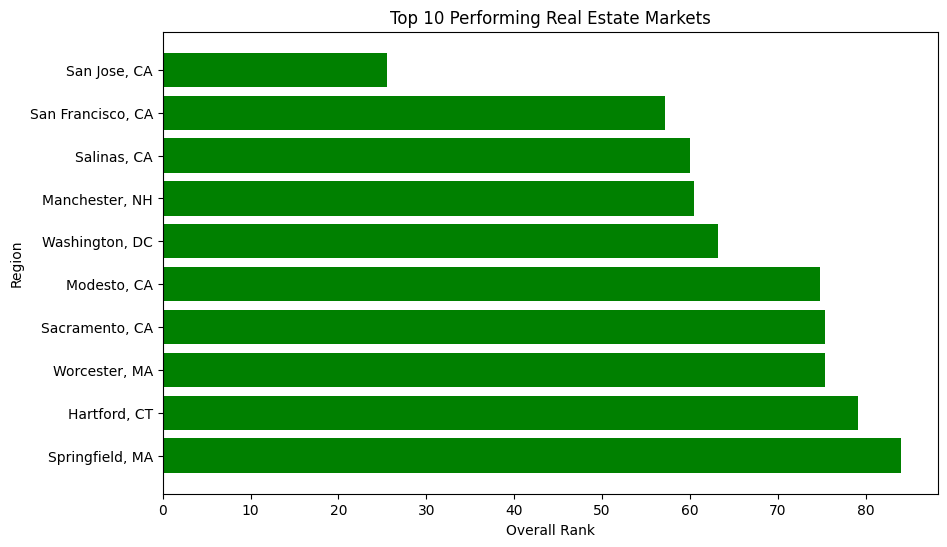

In [9]:

# Bar chart for overall rank
plt.figure(figsize=(10, 6))
plt.barh(top_markets['RegionName'], top_markets['Overall_Rank'], color='green')
plt.xlabel('Overall Rank')
plt.ylabel('Region')
plt.title('Top 10 Performing Real Estate Markets')
plt.gca().invert_yaxis()
plt.show()

### **Bar Chart: Top 10 Performing Real Estate Markets**

### **Why Lower Overall Rank Is Better**

- **Higher Performance Across Metrics**:  
  A lower overall rank means the market consistently excels in the evaluated areas:
  - **Price Growth (ZHVI)**
  - **Rental Returns (ZORI)**
  - **Competitiveness (Market Activity)**

- **Comparative Ranking**:  
  The system ranks markets relative to one another. For example:
  - A market with **Rank 1 for ZHVI**, **Rank 2 for ZORI**, and **Rank 1 for Market Activity** has an **average overall rank of 1.33**, making it highly competitive.
  - A market with **Rank 5, Rank 6, and Rank 7** has an **average overall rank of 6.0**, indicating lower performance compared to the first market.

---

### **Insight 1**
- **San Jose, CA**:  
  If it has the lowest overall rank, it likely performs exceptionally well in price appreciation and market activity, even if its rental yields are moderate.
  
- **Springfield, MA**:  
  If it has a higher overall rank, it might perform well in rental yields but less so in price appreciation or market activity.


### **Insight 2**:
- Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their strong price appreciation, despite relatively moderate rental yields.
- **Salinas, CA** and **Manchester, NH** offer a mix of competitive rental yields and moderate market activity, making them attractive for investors looking for balanced opportunities.


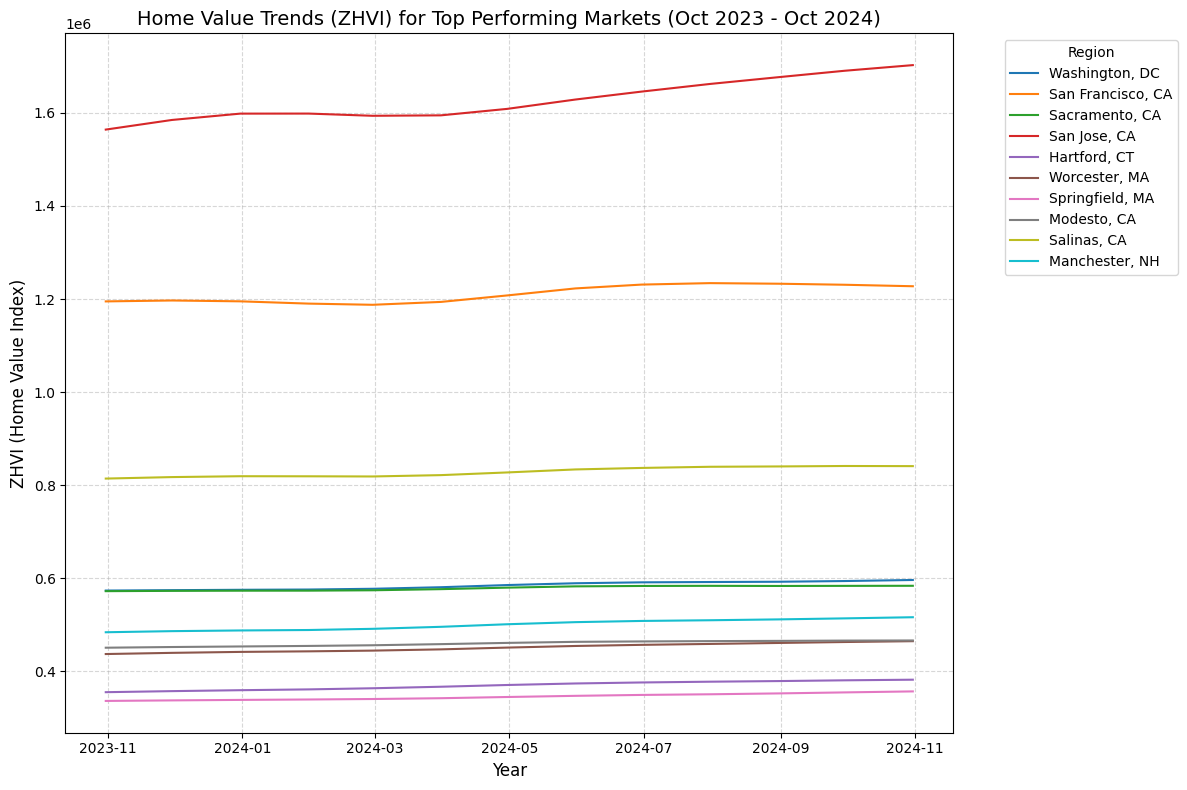

In [10]:
import matplotlib.pyplot as plt

# Extract trends for top market regions from zhvi
top_market_regions = top_markets['RegionName'].unique()
zhvi_trends = zhvi_data[zhvi_data['RegionName'].isin(top_market_regions)]

# Transpose data for plotting (columns as dates, rows as regions)
zhvi_trends = zhvi_trends.set_index('RegionName').drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
zhvi_trends.index = pd.to_datetime(zhvi_trends.index)  # Convert dates to datetime for better plotting

# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Plot the trends
plt.figure(figsize=(12, 8))
for region in zhvi_trends.columns:
    plt.plot(zhvi_trends.index, zhvi_trends[region], label=region)

plt.title("Home Value Trends (ZHVI) for Top Performing Markets (Oct 2023 - Oct 2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ZHVI (Home Value Index)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


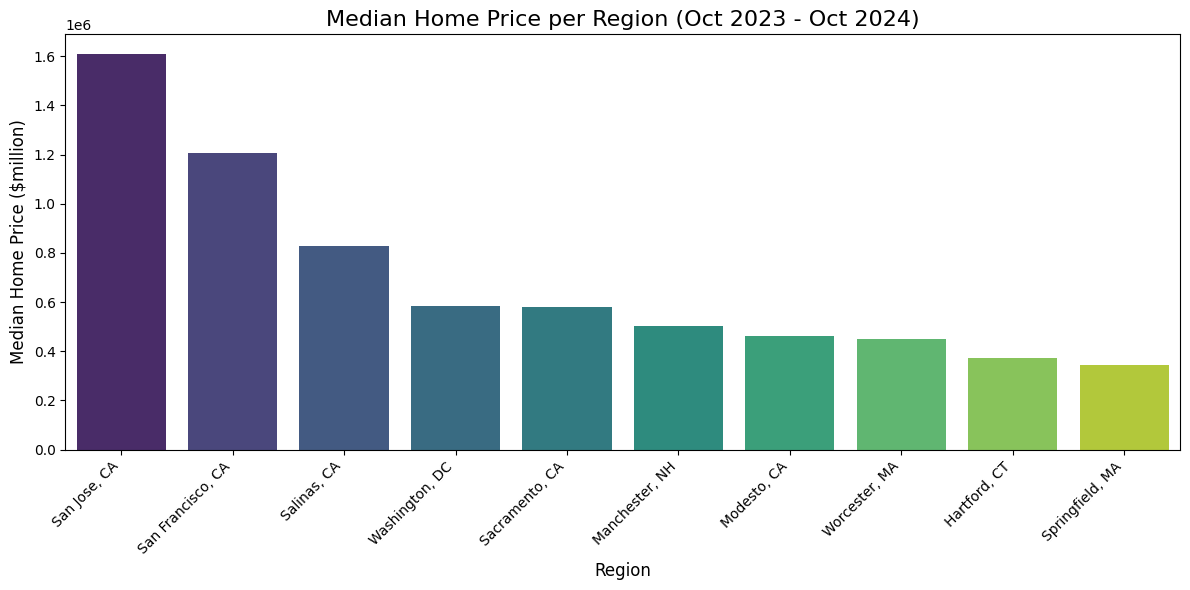

In [11]:
# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Calculate the median home price for each region in the date range
median_home_price = zhvi_trends.median().sort_values(ascending=False).reset_index()
median_home_price.columns = ["RegionName", "Median_ZHVI"]

# Plot the median home price per region as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=median_home_price, x="RegionName", y="Median_ZHVI", hue="RegionName", dodge=False, palette="viridis")
plt.title("Median Home Price per Region (Oct 2023 - Oct 2024)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Median Home Price ($million)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### **Home Value Trends Visualization**

**Line Chart: Home Value Trends (ZHVI) for Top Performing Markets**

- **What It Shows**:  
  This chart tracks how home values (ZHVI) have changed over time in the top 10 real estate markets. Each line represents the average property value in a market, allowing us to compare their growth trends.

- **Key Insights**:
  1. **Fast-Growing Markets**:  
     Cities like *San Jose, CA* and *San Francisco, CA* show sharp increases in home values, indicating strong demand and rapid appreciation. These markets are great for investors who want to buy, upgrade, and sell quickly to maximize profits.
  2. **Steady Growers**:  
     Areas such as *Salinas, CA* and *Manchester, NH* have slower but consistent growth. These markets are better for long-term investments, as their steady increases suggest stability and lower risk.
  3. **Stable or Cooling Markets**:  
     Some regions with flatter lines might be reaching a peak or cooling off. While these areas may not offer as much price appreciation, they could still be profitable for rental income.

- **Why It Matters**:  
  - Steeper lines show markets where property values are growing rapidly, which can lead to higher profits if you sell soon.  
  - Gradual, steady growth suggests reliable markets where property values are less volatile, making them ideal for long-term investments.  
  - Flat trends indicate stable markets, which might still be good for renting out properties or holding for future appreciation.

- **How to Use This Information**:  
  - If you want quick profits, focus on markets with sharp growth like *San Jose* or *San Francisco*.  
  - For steady income and long-term value, look at consistent growers like *Salinas* or *Springfield*.  
  - The chart helps you decide if a market is still growing, stable, or slowing down, so you can plan your investment accordingly.


### **Conclusion for Question 1: Which US Real Estate Market is Doing Best Overall?**

Based on the analysis, the top-performing real estate markets are determined by their strong performance in price appreciation (ZHVI), rental yields (ZORI), and market activity (temperature index). Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their consistent price growth and competitive nature. However, regions such as **Salinas, CA** and **Manchester, NH** offer a balance of moderate price appreciation and high rental yields, making them attractive for long-term investments.

- **High Growth Markets**: *San Jose, CA* and *San Francisco, CA* excel in appreciation, ideal for flipping or short-term investments.
- **Balanced Growth and Rental Yield Markets**: *Salinas, CA* and *Springfield, MA* provide steady price growth and strong rental yields, making them favorable for long-term investments.

Overall, the best market depends on your investment strategy. If rapid price appreciation is the priority, focus on competitive markets with high demand. For consistent returns, target markets with a balance of moderate appreciation and strong rental yields.

---

# 2) Are the sale prices and inventory listing going up or down overall in the US? 10 points (**Cristian Zendejas**)
---

# 3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? 10 points (**Matt Henning**)
---

## Should You Invest Now or Wait? Where Should You Invest?

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]


In [22]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


In [23]:
# Filter inventory_data and dttp_data for October 2023 to October 2024
def filter_by_date_range(df, start_date, end_date, id_vars, value_name):
    # Melt the dataset to reshape it
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    # Convert the Date column to datetime explicitly specifying the format
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    # Filter by the date range
    return df_long[(df_long["Date"] >= start_date) & (df_long["Date"] <= end_date)]

# Define the date range
start_date = "2023-10-01"
end_date = "2024-10-31"

# Reshape and filter inventory_data
inventory_filtered = filter_by_date_range(
    inventory_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="Inventory"
)

# Reshape and filter dttp_data
dttp_filtered = filter_by_date_range(
    dttp_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="DaysOnMarket"
)

# Aggregate the filtered data to get the latest values (October 2024)
inventory_latest = inventory_filtered.groupby(["RegionName", "StateName"])["Inventory"].last().reset_index()
dttp_latest = dttp_filtered.groupby(["RegionName", "StateName"])["DaysOnMarket"].last().reset_index()

# Merge the filtered and aggregated data with top markets
investment_data = pd.merge(top_markets, inventory_latest, on=["RegionName", "StateName"], how="inner")
investment_data = pd.merge(investment_data, dttp_latest, on=["RegionName", "StateName"], how="inner")

print(investment_data)

          RegionName StateName   ZHVI_Latest  ZORI_Latest  MarketTemp_Latest  \
0       San Jose, CA        CA  1.702743e+06        101.0               77.0   
1  San Francisco, CA        CA  1.227564e+06         83.0               60.0   
2        Salinas, CA        CA  8.409708e+05        141.0               53.0   
3     Manchester, NH        NH  5.162688e+05         89.0               68.0   
4     Washington, DC        VA  5.962993e+05         78.0               66.0   
5        Modesto, CA        CA  4.663186e+05         93.0               61.0   
6     Sacramento, CA        CA  5.838314e+05         76.0               62.0   
7      Worcester, MA        MA  4.647810e+05         85.0               65.0   
8       Hartford, CT        CT  3.820292e+05        101.0               80.0   
9    Springfield, MA        MA  3.568748e+05        124.0               68.0   

   ZHVI_Rank  ZORI_Rank  MarketTemp_Rank  Overall_Rank Inventory DaysOnMarket  
0        1.0       68.5              7.

In [15]:
# Analyze inventory and days on market trends
inventory_latest = inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'})
dttp_latest = dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'})

# Merge with top markets data
investment_data = pd.merge(top_markets, inventory_latest, on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_latest, on=['RegionName', 'StateName'], how='inner')

# Display investment data
investment_data

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank,Inventory_Latest,DaysOnMarket_Latest
0,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000,1933.0,28.0
1,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667,6139.0,36.0
2,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000,599.0,43.0
3,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000,530.0,19.0
4,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667,10456.0,29.0
5,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333,946.0,35.0
6,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333,5598.0,38.0
7,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333,1672.0,26.0
8,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667,1833.0,20.0
9,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000,1132.0,25.0


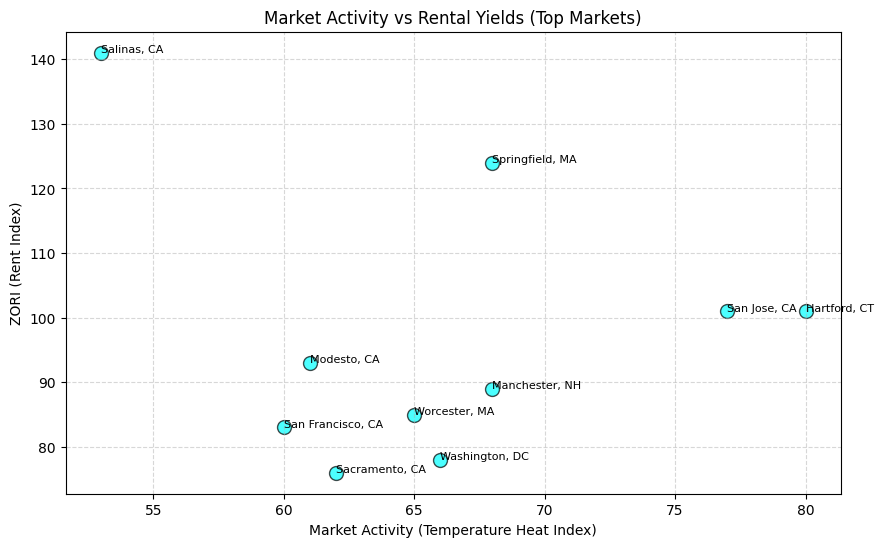

In [16]:
# Scatter plot: Market Activity vs Rental Yields
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['MarketTemp_Latest'], investment_data['ZORI_Latest'], color='cyan', s=100, edgecolors='k', alpha=0.7)
for i, region in enumerate(investment_data['RegionName']):
    plt.text(investment_data['MarketTemp_Latest'].iloc[i], investment_data['ZORI_Latest'].iloc[i], region, fontsize=8)

plt.xlabel('Market Activity (Temperature Heat Index)')
plt.ylabel('ZORI (Rent Index)')
plt.title('Market Activity vs Rental Yields (Top Markets)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Market Activity vs Rental Yields**

This scatter plot illustrates the relationship between **Market Activity (Temperature Heat Index)** and **Rental Yields (ZORI)** in the top-performing real estate markets. It helps identify the type of opportunities each market offers based on competition and rental income potential.

- **High Rental Yields, Moderate Competition**:  
  Markets with strong rental yields but lower competition (low temperature index) could be undervalued gems. These areas may provide great opportunities for rental investments with less competition from other buyers. For example, if a market has high ZORI but relatively low Market Activity, it’s likely a lucrative market for rental income.

- **Highly Competitive Markets**:  
  In markets with high activity (high temperature index), such as **San Jose, CA**, rental yields might be lower, but these areas excel in price appreciation. Such markets are ideal for investors interested in flipping or selling upgraded properties quickly at a profit.

- **Key Takeaway**:  
  This plot helps investors balance their strategies:  
  - For rental income, focus on markets with high ZORI and moderate competition.  
  - For flipping and quick resale, target markets with high competition and appreciation potential.  
  Use this visualization to identify which markets align with your investment goals.


<Figure size 1000x800 with 0 Axes>

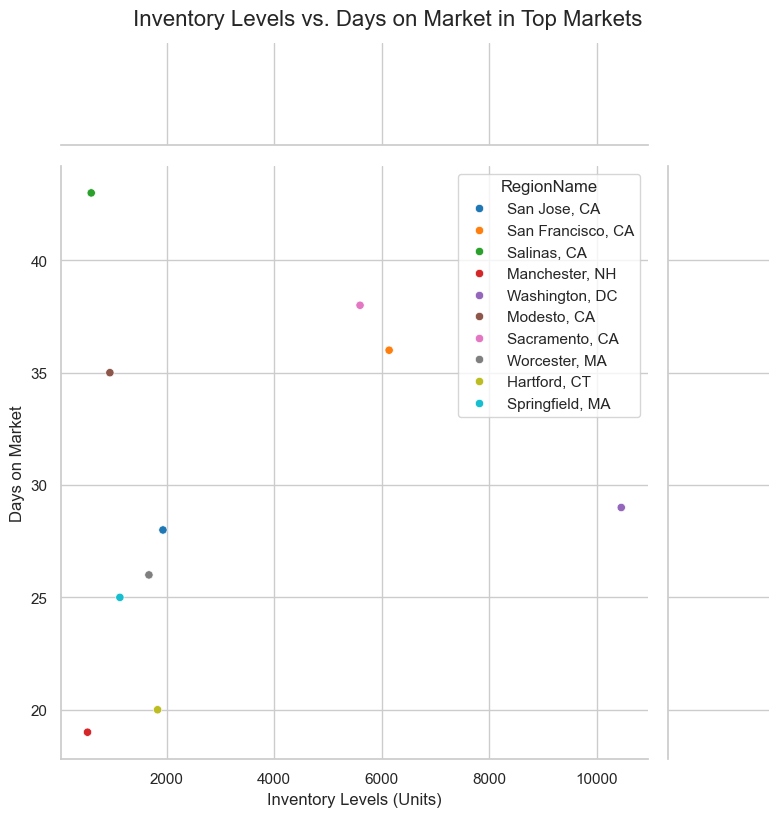

In [17]:
# joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    kind="scatter",
    hue="RegionName",
    palette="tab10",
    height=8,
    marginal_kws=dict(bins=20, fill=True),
)

plt.suptitle("Inventory Levels vs. Days on Market in Top Markets", y=1.02, fontsize=16)
plt.xlabel("Inventory Levels (Units)")
plt.ylabel("Days on Market")
plt.show()



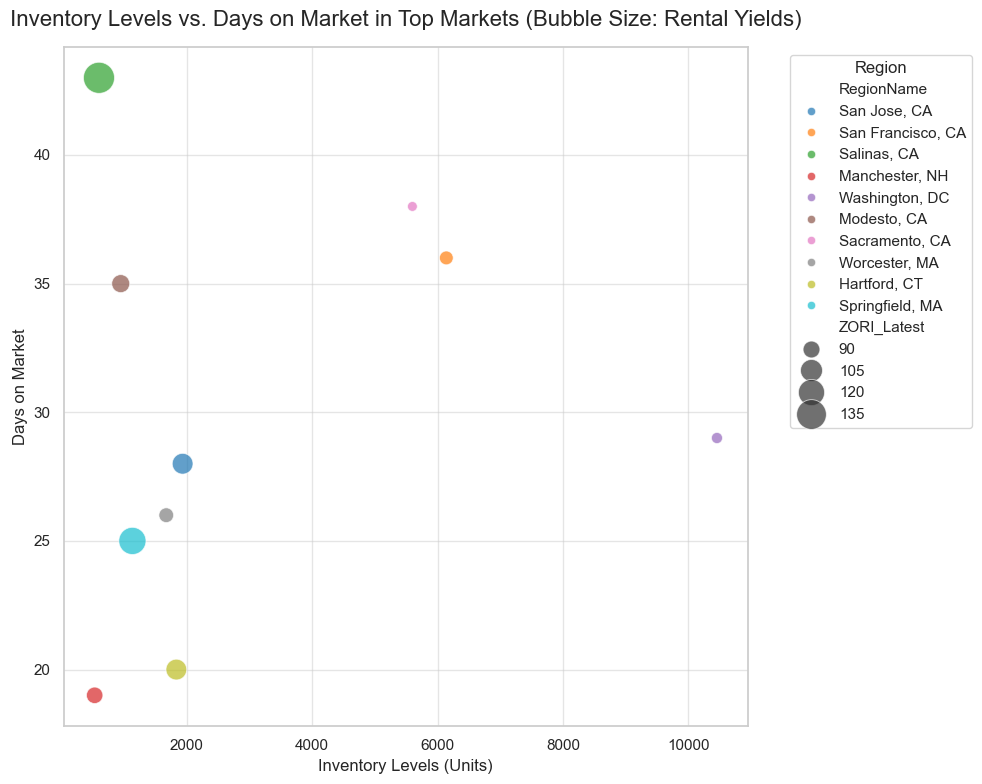

In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a bubble graph
sns.scatterplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    size="ZORI_Latest",  # Bubble size reflects rental yields (or choose another metric)
    hue="RegionName",  # Different colors for regions
    palette="tab10",  # Color palette for regions
    sizes=(50, 500),  # Adjust size range for bubbles
    alpha=0.7  # Transparency for better visibility
)

# Add titles and labels
plt.title("Inventory Levels vs. Days on Market in Top Markets (Bubble Size: Rental Yields)", fontsize=16, pad=15)
plt.xlabel("Inventory Levels (Units)", fontsize=12)
plt.ylabel("Days on Market", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Region")
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()



### **Inventory Levels vs. Days on Market**

These visualizations explore the relationship between **Inventory Levels** and **Days on Market** in the top-performing real estate markets. 

  - **Scatter Plot**: Each point represents a market (region), showing how much inventory is available (x-axis) and how quickly homes are selling (y-axis).
  - **Hue for Region Names**: Each market is color-coded to help differentiate between the top-performing locations.
  - **Marginal Distributions**: Histograms along the axes show the distribution of inventory levels and days on market, revealing overall trends.
  -  **Bubble Chart**: This bubble chart explores the relationship between **Inventory Levels** (x-axis) and **Days on Market** (y-axis) in the top-performing real estate markets. It also incorporates:
- **Bubble Size**: Reflects rental yields (ZORI_Latest), with larger bubbles representing higher rental profitability.
- **Hue for Region Names**: Each region is color-coded, allowing easy differentiation between markets.


- **Key Insights**:
  1. **Low Inventory, Low Days on Market**:  
     Markets with low inventory and quick sales (e.g., low days on market) are highly competitive, making them ideal for flipping or quick resale. These markets indicate high buyer demand and fast-moving properties.
  2. **High Inventory, High Days on Market**:  
     Markets with higher inventory and longer days on market may offer opportunities for investors to negotiate better deals. These areas are more suited for rental investments, where securing a property at a lower cost may yield higher returns over time.
  3. **Balanced Markets**:  
     Some markets show moderate inventory levels and days on market, striking a balance between availability and demand. These markets can be a good choice for both flipping and long-term investments.

- **Why I care**:  
  This visualization helps you identify markets that align with your goals:
  - For **quick resale**: Look for markets with low inventory and days on market.  
  - For **long-term rental investments**: Focus on markets with higher inventory, as they may provide more favorable purchase conditions.

Th scatter plot and bubble chart show how competitive a market is.


In [41]:
print(investment_data.columns)


Index(['RegionName', 'StateName', 'ZHVI_Latest', 'ZORI_Latest',
       'MarketTemp_Latest', 'ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank',
       'Overall_Rank', 'Inventory_Latest', 'DaysOnMarket_Latest'],
      dtype='object')


In [42]:
# Rename columns for heatmp
investment_data = investment_data.rename(columns={
    "inventory_latest": "Inventory",
    "days_on_market_latest": "DaysOnMarket"
})

In [43]:
# Merge inventory and days on market data with top markets
investment_data = pd.merge(
    top_markets,
    inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory'}),
    on=['RegionName', 'StateName'],
    how='inner'
)
investment_data = pd.merge(
    investment_data,
    dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket'}),
    on=['RegionName', 'StateName'],
    how='inner'
)

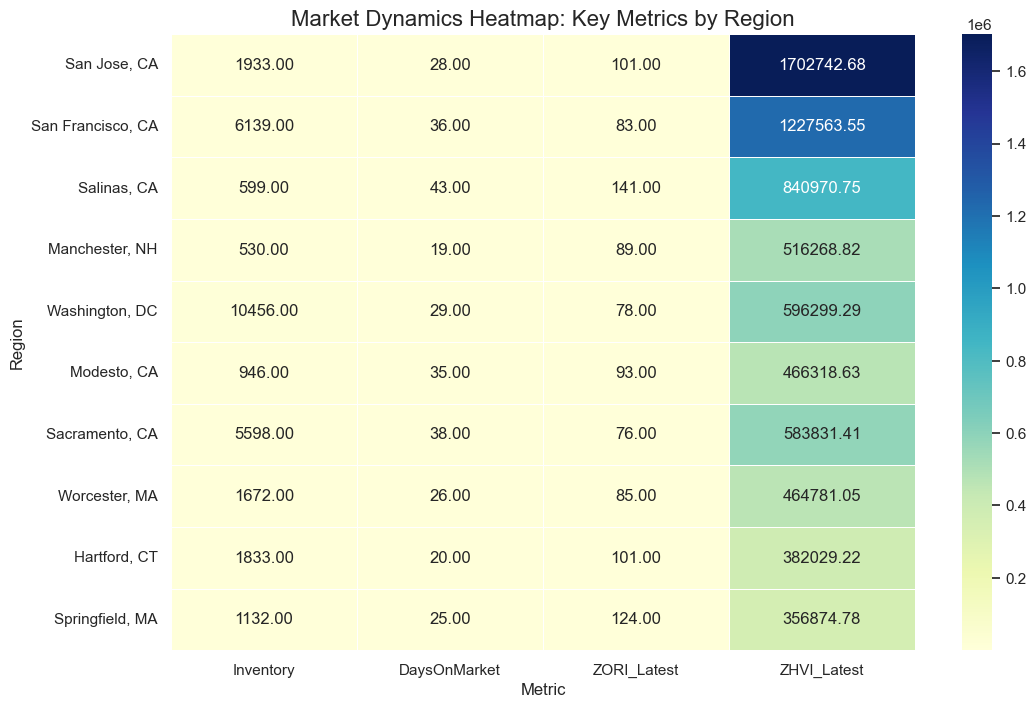

In [44]:
# Prepare data for the heatmap
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



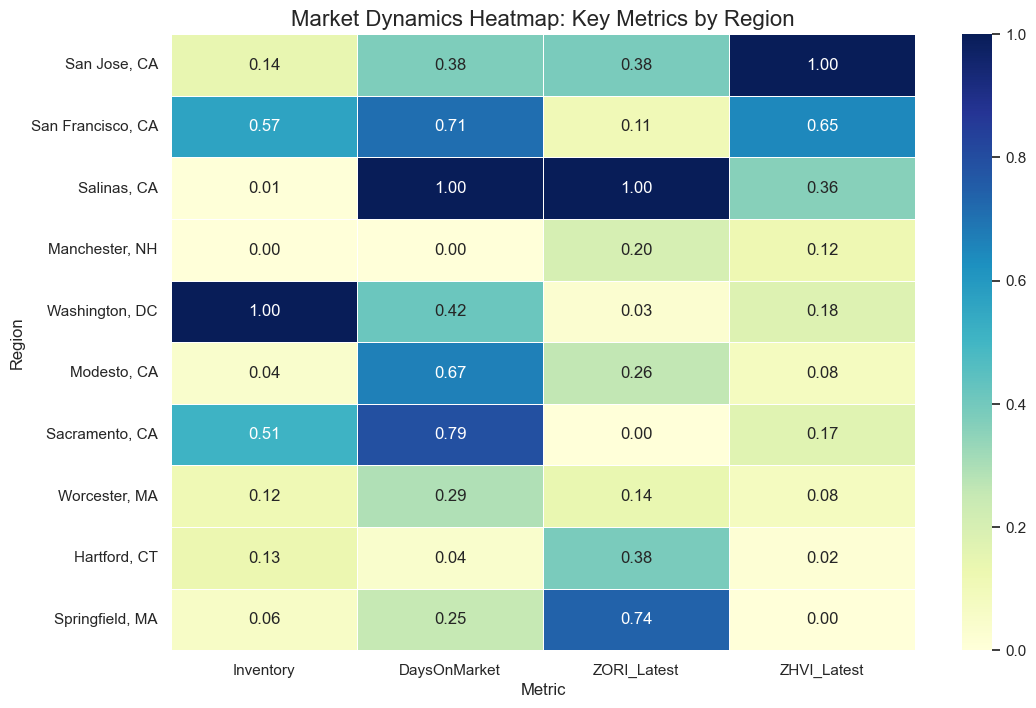

In [46]:
# exact same as before but with each metric normalized, easier on the eyes
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]
#added after too much trial and error to "normalize the data"
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



## **Market Dynamics Heatmap: Key Metrics by Region**

This heatmap provides a side-by-side comparison of the four metrics provided by Zillow metrics across several regions. Each metric is normalized (scaled between 0 and 1) to make comparisons across different scales possible. Darker shades indicate higher values, while lighter shades indicate lower values.

---

### **Zillow Metrics Explained**
1. **Inventory**:
   - Measures the number of homes available for sale in the region.
   - **Darker cells** (higher values): Indicate regions with more inventory, suggesting a buyer's market with less competition.
   - **Lighter cells** (lower values): Indicate tighter inventory, signaling a seller's market.

2. **Days on Market (DOM)**:
   - Tracks how quickly properties are selling in the region.
   - **Darker cells** (higher values): Indicate properties take longer to sell, possibly due to lower demand or higher pricing.
   - **Lighter cells** (lower values): Indicate "hot" markets with high buyer demand and quick sales.

3. **ZORI_Latest**:
   - Reflects the rental yields (Zillow Observed Rent Index) in the region.
   - **Darker cells** (higher values): Indicate stronger rental demand and higher profitability for landlords.
   - **Lighter cells** (lower values): Suggest lower rental profitability.

4. **ZHVI_Latest**:
   - Represents home value appreciation (Zillow Home Value Index).
   - **Darker cells** (higher values): Indicate regions with strong price growth and high property values.
   - **Lighter cells** (lower values): Suggest lower appreciation potential.

---

### **Key Insights**
1. **San Jose, CA**:
   - **Low Inventory** (0.14) but **High ZHVI_Latest** (1.00): Indicates a highly competitive market with strong home value growth, ideal for *immediate* appreciation-focused investments.

2. **Salinas, CA**:
   - **Extremely Low Inventory** (0.01) and **High ZORI_Latest** (1.00): Suggests a tight rental market with high profitability for landlords.

3. **Manchester, NH**:
   - **Very Low Inventory** (0.00) and **Moderate Rental Yields** (0.20): Indicates strong demand but lower rental profitability compared to other markets.

4. **Washington, DC**:
   - **High Inventory** (1.00) but **Low Rental Yields** (0.03): Suggests a cooling market with opportunities for negotiation but less attractive for rental income.

5. **Springfield, MA**:
   - **Moderate Inventory** (0.06) and **High ZORI_Latest** (0.74): A balanced market offering strong rental yields and moderate competition.

---

### **How to Use This Heatmap**
- **For Flipping**:
  - Focus on regions with **low inventory** and **high ZHVI_Latest**, such as *San Jose, CA* and *Salinas, CA*.
- **For Rental Income**:
  - Target regions with **high ZORI_Latest**, like *Salinas, CA* or *Springfield, MA*, for strong rental profitability.
- **Bonus Opportunities**:
  - Check out regions with **high inventory** and **long days on market**, like *Washington, DC*, where buyers have leverage.



### **Conclusion on Q3 -- Should You Invest Now or Wait? Where Should You Invest?**

Given the current market trends, **now is a favorable time to invest** in real estate. Many markets demonstrate strong price growth and competitive activity, suggesting demand remains high. 

- **Invest Now If**: You aim to capitalize on current market dynamics, particularly in competitive regions with strong price appreciation like **San Jose, CA**. Quick resale opportunities are better in these high-demand markets.
- **Recommended Markets**:
  - For rental income: *Salinas, CA* and *Springfield, MA*, with strong rental yields and moderate competition.
  - For flipping: *San Francisco, CA* and *San Jose, CA*, where price appreciation remains robust, and demand is strong.

Investing now in the above chosen markets to yield significant returns.

# 4) How long some of the real-estate stays on the market before they rent or sell? 10 points (**Tracy Mengyuan Cui**)
---

# 5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 10 Points (**David Braun**)
---

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual path or input
zhvf_df = pd.read_csv('Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual path or input

In [ ]:
# Ensure RegionID exists and matches in both dataframes
if 'RegionID' not in zhvi_df.columns or 'RegionID' not in zhvf_df.columns:
    raise KeyError("Both DataFrames must contain 'RegionID' for merging.")

# Merge dataframes
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')
print(f"Merged DataFrame shape: {merged_df.shape}")

In [ ]:
# Specify columns for ZHVI (current value) and ZHVF (forecasted value)
roi_column_zhvi = '10/31/2024'  # Replace with the correct column from zhvi_df
roi_column_zhvf = '11/30/2024'  # Replace with the correct column from zhvf_df

# Check if these columns exist
if roi_column_zhvi not in merged_df.columns or roi_column_zhvf not in merged_df.columns:
    raise KeyError(f"Columns '{roi_column_zhvi}' or '{roi_column_zhvf}' do not exist in the merged DataFrame.")

# Calculate ROI
merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100
print("ROI calculation complete.")


In [ ]:
# Remove rows with invalid ROI values
merged_df = merged_df[np.isfinite(merged_df['ROI'])]
merged_df = merged_df.dropna(subset=['ROI'])  # Drop NaN values in ROI
print(f"Cleaned DataFrame shape: {merged_df.shape}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual file path
zhvf_df = pd.read_csv('Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual file path

# Merge the datasets on 'RegionID'
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')

# Specify columns for ROI calculation
roi_column_zhvi = '10/31/2024'  # Adjust to the correct column name
roi_column_zhvf = '11/30/2024'  # Adjust to the correct column name

# Ensure the selected columns exist in the merged dataset
if roi_column_zhvi in merged_df.columns and roi_column_zhvf in merged_df.columns:
    # Calculate ROI
    merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100

    # Clean the data (remove invalid or non-finite ROI values)
    merged_df = merged_df[np.isfinite(merged_df['ROI'])].dropna(subset=['ROI'])

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(merged_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
    plt.title("Boxplot of ROI")
    plt.xlabel("ROI (%)")
    plt.show()
else:
    print(f"One or both columns '{roi_column_zhvi}' and '{roi_column_zhvf}' do not exist in the merged dataset.")

In [ ]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

In [ ]:
# Cap outliers at the lower and upper bounds
merged_df['ROI'] = merged_df['ROI'].clip(lower=-81024616.83333334, upper=13659577.3888889)

In [ ]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = merged_df[(merged_df['ROI'] >= lower_bound) & (merged_df['ROI'] <= upper_bound)]
print(f"Data size before cleaning: {merged_df.shape[0]}, after cleaning: {cleaned_df.shape[0]}")


In [ ]:
# Create the boxplot after cleaning
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title("Boxplot of ROI After Cleaning")
plt.xlabel("ROI (%)")
plt.show()

### Explanation 
#### Key Components of the Boxplot:

1. **Blue Box**:
   - Represents the **Interquartile Range (IQR)**, which spans the middle 50% of the data.
   - The lower edge of the box is the first quartile (Q1, 25th percentile), and the upper edge is the third quartile (Q3, 75th percentile).

2. **Horizontal Line Inside the Box**:
   - Indicates the **median (Q2)**, or the midpoint of the data distribution.

3. **Whiskers**:
   - Extend to the smallest and largest data points within 1.5 times the IQR from Q1 and Q3, respectively.
   - Points beyond the whiskers are considered outliers and have been removed during the cleaning process.

4. **Green Triangle**:
   - Represents the **mean (average)** of the ROI data after cleaning.
   - The mean provides an additional measure of central tendency and allows for comparison with the median.

#### Key Observations:
- After cleaning, the data is tightly distributed with fewer outliers, as extreme values have been removed.
- The mean (green triangle) is slightly shifted from the median (horizontal line), indicating some asymmetry in the data.

This cleaned boxplot provides a clearer and more accurate view of the ROI data distribution, making it easier to interpret and analyze trends without the distraction of extreme outliers.


### Assumptions:

#### Mortgage:
- **80% Loan-to-Value (LTV)**.
- **5% annual interest rate**.
- **30-year term**.

#### Dates used for Purchase and Sale Dates:
- **Purchase**: January 2023.
- **Sale**: September 2024.

In [1]:
sale_price_df = pd.read_csv('Metro_median_sale_price_uc_sfrcondo_month.csv')
print(sale_price_df.head()) 

NameError: name 'pd' is not defined

In [ ]:
print(zhvi_df.columns)
print(sale_price_df.columns)


In [ ]:
zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
sale_price_df = pd.read_csv('Metro_median_sale_price_uc_sfrcondo_month.csv')

In [ ]:
merged_df = zhvi_df.merge(sale_price_df, on="RegionID", suffixes=("_purchase", "_sale"))

In [ ]:
print(merged_df.columns)

In [ ]:
# Correct the purchase and sale price column references
purchase_date = "1/31/2023_purchase"  # Adjusted for ZHVI with suffix
sale_date = "3/31/2024_sale"         # Adjusted for Sale Price with suffix

# Calculate Purchase Price and Sale Price
merged_df["Purchase Price"] = merged_df[purchase_date]
merged_df["Sale Price"] = merged_df[sale_date]


merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Calculate Net Profit
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]

# Calculate Profit Percentage
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()

print(f"Average Profit Percentage: {average_profit_percentage:.2f}%")


In [ ]:
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

In [ ]:
print(merged_df.head())

In [ ]:
# Adjust Mortgage Paid for 1.75 years
merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Recalculate Net Profit and Profit Percentage
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Exclude Outliers
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Adjusted Average Profit Percentage: {average_profit_percentage:.2f}%")

In [ ]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 6
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")


In [ ]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 4
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")

In [ ]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 10
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")

In [ ]:
# Inputs
n_months = 6  # Number of months held
annual_interest_rate = 0.05  # Annual interest rate (5%)
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8  # 80% Loan-to-Value ratio
down_payment_percentage = 1 - loan_to_value  # 20% Down Payment
upgrades_cost = 15000  # Example cost of upgrades ($)
required_profit_percentage = 20  # Minimum profit percentage to justify upgrades

# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price for Upgrades
net_gain_from_upgrades = 20000  # Example net gain from upgrades ($)
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit including Upgrades Cost
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Down Payment"]
    - merged_df["Total Mortgage Paid"]
    - upgrades_cost  # Include upgrades cost
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Filter rows meeting the required profit percentage
profitable_upgrades = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Calculate Average Profit Percentage for these cases
average_profit_percentage = profitable_upgrades["Profit Percentage"].mean()

# Output results
print(f"Average Profit Percentage for profitable cases: {average_profit_percentage:.2f}%")
print(f"Number of properties meeting the profit threshold: {len(profitable_upgrades)}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure profitable_properties is defined
required_profit_percentage = 20  # Minimum profit percentage to include
profitable_properties = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

print(f"Number of profitable areas: {len(area_summary)}")

In [ ]:
# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName"] if "RegionName" in grouping_columns else top_areas["RegionID"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name" if "RegionName" in grouping_columns else "Region ID")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()

In [ ]:
print (profitable_properties)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjusted to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


# 6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI. 10 Points (**Soad Ahmed**)
---